In [1]:
#1. Set Up the Database

import sqlite3
# Connect to database
connection = sqlite3.connect('student_grades.db')


# Check if the connection was successful
print("Database created!")

# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")
cursor.close()

Database created!
Cursor created!


In [2]:
#2. Create the necessary tables
cursor = connection.cursor()

# Create the students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("Students table created!")

# Create the grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

cursor.close()

Students table created!


In [3]:
#3. insert data
cursor = connection.cursor()
# Sample data to insert into the students table
students = [
    ('Hunter', 'Holden'),
    ('Mckenna', 'Kundis'),
    ('Kate', 'Gillen'),
    ('Margot','Brady'),
    ('Abigail', 'Mchoul')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students)

# Commit the transaction
connection.commit()

print("Data inserted into the students table!")


grades = [
    (1, 'History', 100),
    (1, 'Math', 78),
    (1, 'English', 93),
    (2, 'History', 95),
    (2, 'Math', 88),
    (2, 'English', 90),
    (3, 'History', 89),
    (3, 'Math', 67),
    (3, 'English', 98),
    (4, 'History', 100),
    (4, 'Math', 100),
    (4, 'English', 90),
    (5, 'History', 82),
    (5, 'Math', 75),
    (5, 'English', 97)
    
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?,?)
''', grades) 

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")
cursor.close()

Data inserted into the students table!
Data inserted into the grades table!


In [7]:
#4. SQL queries 
cursor = connection.cursor()
#Retrieve all students' names and their grades

# Perform a JOIN query between students and grades
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade, grades.student_id
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

# Fetch and display the results
joined_data = cursor.fetchall()

studentdict = {}

for row in joined_data:
    name = f"{row[0]} {row[1]}"
    subjectgrade = (row[2], row[3])
    if name in studentdict:
        studentdict[name].append(subjectgrade)
    else: 
        studentdict[name] = []
        studentdict[name].append(subjectgrade)

#Print results
print("Student grades: ")
for student, grades in studentdict.items():
    print(f"{student}:")
    for subject, grade in grades:
        print(f"  {subject}: {grade}")

cursor.close()

Student grades: 
Hunter Holden:
  History: 100
  Math: 78
  English: 93
Mckenna Kundis:
  History: 95
  Math: 88
  English: 90
Kate Gillen:
  History: 89
  Math: 67
  English: 98
Margot Brady:
  History: 100
  Math: 100
  English: 90
Abigail Mchoul:
  History: 82
  Math: 75
  English: 97


In [8]:
#Find the average grade for each student
cursor = connection.cursor()



cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS gradeavg
FROM students
JOIN grades ON students.student_id = grades.student_ID
GROUP BY grades.student_id
''')

gradeavg = cursor.fetchall()

print('Grade Averages for Each Student:')
for row in gradeavg:
    print(f"{row[0]} {row[1]}: {row[2]}")

cursor.close()

Grade Averages for Each Student:
Hunter Holden: 90.33333333333333
Mckenna Kundis: 91.0
Kate Gillen: 84.66666666666667
Margot Brady: 96.66666666666667
Abigail Mchoul: 84.66666666666667


In [9]:
#3. Find the student with the highest average grade
cursor = connection.cursor()



cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS grade_avg
FROM students
JOIN grades ON students.student_id = grades.student_ID
GROUP BY grades.student_id
ORDER BY grade_avg DESC
LIMIT 1
''')

highestavg = cursor.fetchall()

print('Student with the highest grade average: ')
for row in highestavg:
    print(f"{row[0]} {row[1]}: {row[2]}")

cursor.close()


Student with the highest grade average: 
Margot Brady: 96.66666666666667


In [10]:
#4. Find the average grade for the Math subject.

cursor = connection.cursor()


cursor.execute('''
SELECT grades.subject, AVG(grades.grade) AS grade_avg
FROM grades
WHERE grades.subject = 'Math'
''')

subjectgrades = cursor.fetchall()

print('Average grade for math:')
for row in subjectgrades:
    print(row)

cursor.close()



Average grade for math:
('Math', 81.6)


In [20]:
#5. List all the students who scored above a 90 on any subject

cursor = connection.cursor()

cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')


above90 = cursor.fetchall()


print("Students who scored above 90 in any subject:")

# Create a dictionary
ninetydict = {}

for row in above90:
    name = f"{row[0]} {row[1]}"
    subjectgrade = (row[2], row[3])
    if name in ninetydict:
        ninetydict[name].append(subjectgrade)
    else: 
        ninetydict[name] = []
        ninetydict[name].append(subjectgrade)


#Print results
for student, grades in ninetydict.items():
    print(f"{student}")



cursor.close()


Students who scored above 90 in any subject:
Hunter Holden
Mckenna Kundis
Kate Gillen
Margot Brady
Abigail Mchoul


In [21]:
# Take all data from students and put into a pandas dataframe
import pandas as pd
cursor = connection.cursor()

students = pd.read_sql_query('SELECT * FROM students', connection)


print(students.head())

#Take all data from grades and put into a pandas dataframe

grades = pd.read_sql_query('SELECT * FROM grades', connection)

print(grades.head())

   student_id first_name last_name
0           1     Hunter    Holden
1           2    Mckenna    Kundis
2           3       Kate    Gillen
3           4     Margot     Brady
4           5    Abigail    Mchoul
   grade_id  student_id  subject  grade
0         1           1  History    100
1         2           1     Math     78
2         3           1  English     93
3         4           2  History     95
4         5           2     Math     88


In [22]:
#Combined pandas dataframe
stugrades = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)

stugrades.head(10)

,first_name,last_name,subject,grade
0,Hunter,Holden,History,100
1,Hunter,Holden,Math,78
2,Hunter,Holden,English,93
3,Mckenna,Kundis,History,95
4,Mckenna,Kundis,Math,88
5,Mckenna,Kundis,English,90
6,Kate,Gillen,History,89
7,Kate,Gillen,Math,67
8,Kate,Gillen,English,98
9,Margot,Brady,History,100


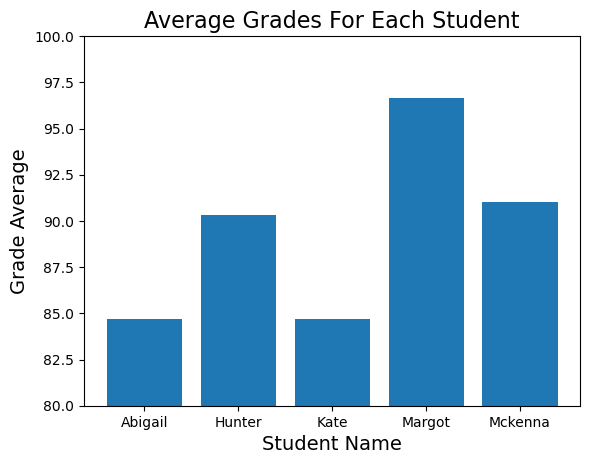

In [23]:
#Plot the average grades for each student
avggrades = stugrades.groupby(['first_name','last_name'])['grade'].mean().reset_index()

import matplotlib.pyplot as plt

plt.bar(avggrades['first_name'],avggrades['grade'])
plt.plot()

plt.xlabel("Student Name", fontsize = 14)
plt.ylabel("Grade Average", fontsize = 14)
plt.title("Average Grades For Each Student", fontsize = 16)
plt.ylim(80, 100)
plt.show()


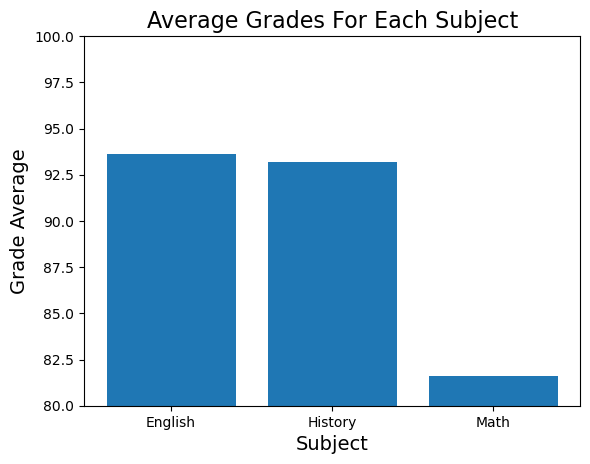

In [24]:
#Create a bar chart showing the average grade for each subject

subavgs = stugrades.groupby('subject')['grade'].mean().reset_index()
import matplotlib.pyplot as plt

plt.bar(subavgs['subject'],subavgs['grade'])
plt.plot()

plt.xlabel("Subject", fontsize = 14)
plt.ylabel("Grade Average", fontsize = 14)
plt.title("Average Grades For Each Subject", fontsize = 16)
plt.ylim(80, 100)
plt.show()

connection.close()

In [30]:
# BONUS: Implement a query that finds the student with the highest grade in each subject
connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()


cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, MAX(grades.grade) as highestgrade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY grades.subject
''')


highestgrades = cursor.fetchall()

print('Highest grades for each subject')
for row in highestgrades:
    print(f"{row[0]} {row[1]}: {row[2]}")

cursor.close()


Highest grades for each subject
Kate Gillen: English
Hunter Holden: History
Margot Brady: Math
